<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [104]:
import simdkalman
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [114]:
kf = simdkalman.KalmanFilter(state_transition=np.array([[1, 1], [0, 1]]), process_noise = np.diag([0.1, 0.01]), observation_model=np.array([[1, 0]]), observation_noise=1.0)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

data = np.cumsum(np.random.normal(size=100))
axes[0].plot(data);

# Introduce 10% of NaNs denoting missing values
data[np.random.uniform(size=data.shape)<0.1] = np.nan
axes[1].plot(data);

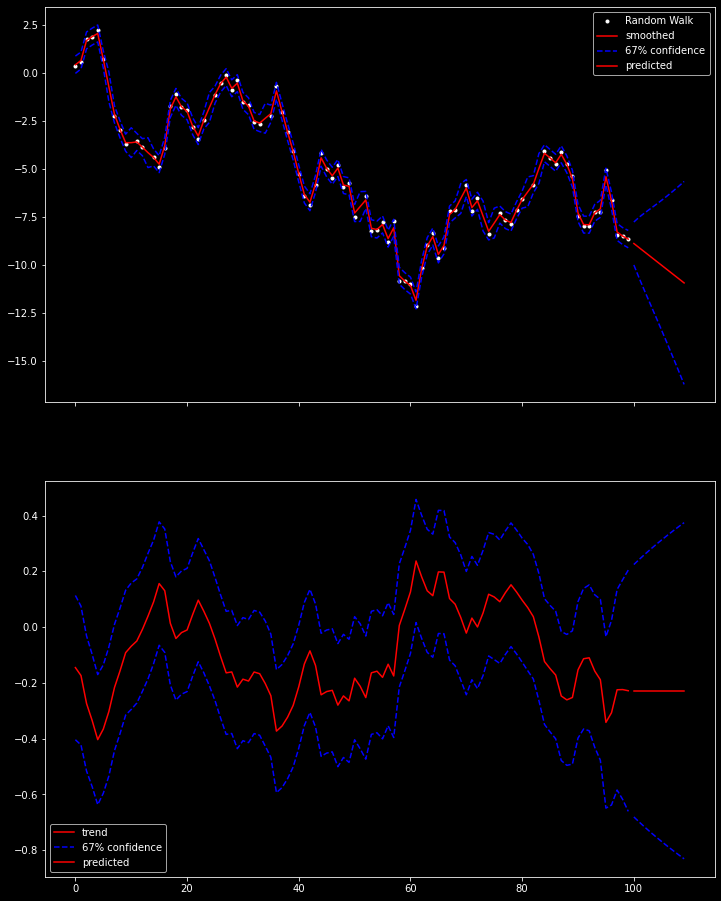

In [118]:
# fit noise parameters to data with the EM algorithm (optional)
# 1. 칼만필터를 통해서 분포를 추정. em = estimate
kf = kf.em(data, n_iter=10)
# Smoothing
smoothed = kf.smooth(data)

# 칼만필터를 통해서 추정한 분포로 값을 예측합니다.
# n_test: number of future steps to predict.
pred = kf.predict(data, n_test=10)

xs = np.arange(data.shape[0])
xs_pred = np.arange(data.shape[0], data.shape[0] + pred.observations.mean.shape[0])

smoothed_mean = smoothed.observations.mean
smoothed_std = np.sqrt(smoothed.observations.cov)

pred_mean = pred.observations.mean
pred_std = np.sqrt(pred.observations.cov)

trend = smoothed.states.mean[:, 1]
trend_std = np.sqrt(smoothed.states.cov[:, 1, 1])

trend_pred = pred.states.mean[:, 1]
trend_pred_std = np.sqrt(pred.states.cov[:, 1, 1])

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 16))

axes[0].plot(xs, data, "w.", label="Random Walk")

axes[0].plot(xs, smoothed_mean, "r-", label="smoothed");
axes[0].plot(xs, smoothed_mean - smoothed_std, "b--", label="67% confidence");
axes[0].plot(xs, smoothed_mean + smoothed_std, "b--");

axes[0].plot(xs_pred, pred_mean, "r-", label="predicted");
axes[0].plot(xs_pred, pred_mean + pred_std, "b--");
axes[0].plot(xs_pred, pred_mean - pred_std, "b--");

axes[0].legend();

axes[1].plot(xs, trend, "r-", label="trend")
axes[1].plot(xs, trend - trend_std, "b--", label="67% confidence")
axes[1].plot(xs, trend + trend_std, "b--")

axes[1].plot(xs_pred, trend_pred, "r-", label="predicted");
axes[1].plot(xs_pred, trend_pred + trend_pred_std, "b--");
axes[1].plot(xs_pred, trend_pred - trend_pred_std, "b--");

axes[1].legend();